In [246]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load the data

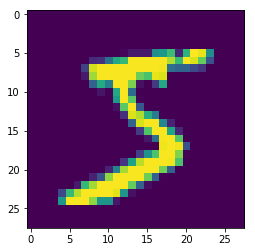

In [2]:

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

for i in range(1):
    fig, ax = plt.subplots(figsize=(4,4))
    ax.imshow(x_train[i])
    plt.show()


# Build a classification model

In [16]:
# sequential model
model = keras.Sequential()
model.add(layers.Input(shape=(28,28), name='MNIST_image'))
model.add(layers.Reshape(target_shape=(28*28,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)

60000/60000 [==============================] - 2s 41us/sample - loss: 0.2937 - acc: 0.9144


10000/10000 [==============================] - 0s 25us/sample - loss: 0.1660 - acc: 0.9487


[0.16601060590595007, 0.9487]

In [19]:

# functional API
inputs = layers.Input(shape=(28,28), name='MNIST_image')
x = layers.Reshape((28*28,))(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_fAPI = keras.Model(inputs=inputs, outputs=outputs, name='mnist_fAPI_model')

model_fAPI.summary()

model_fAPI.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_fAPI.fit(x_train, y_train, epochs=1)
model_fAPI.evaluate(x_test, y_test)

Model: "mnist_fAPI_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MNIST_image (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2932 - acc: 0.9147


10000/10000 [==============================] - 0s 31us/sample - loss: 0.1526 - acc: 0.9533


[0.15255377225801348, 0.9533]

In [23]:
def test_model(model):

    print('Testing model {}'.format(model.name))
    y_pred = model.predict(x_test)
    flat_y_test = y_test.argmax(axis=1)
    flat_y_pred = y_pred.argmax(axis=1)
    
    wrongs = 0
    for i in range(len(x_test)):
        pred = flat_y_pred[i]
        true = flat_y_test[i]
        if pred != true:
            print('Example {}: True number {}, predicted {}'.format(i, true, pred))
            fig, ax = plt.subplots()
            ax.imshow(x_test[i].reshape(28,28))
            plt.show()
            # break
            wrongs+=1
            if wrongs > 2:
                break
            

#test_model(model)
#test_model(model_fAPI)

# Build an autoencoder

In [238]:
latent_dim = 32

encoder_input = layers.Input(shape=(28,28))
x = layers.Reshape((28*28,))(encoder_input)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
encoder_output = layers.Dense(latent_dim, activation='relu')(x)
encoder_ae = keras.Model(inputs=encoder_input, outputs=encoder_output, name='encoder')

#encoder.summary()

decoder_input = layers.Input(shape=(latent_dim))
x = layers.Dense(32, activation='relu')(decoder_input)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(28*28, activation='relu')(x)
x = layers.Reshape((28,28))(x)
decoder_output = layers.Activation('softmax', name='softmax')(x)
decoder_ae = keras.Model(inputs=decoder_input, outputs=decoder_output, name='decoder')

#decoder.summary()

autoencoder_input = layers.Input((28,28))
z = encoder_ae(autoencoder_input)
autoencoder_output = decoder_ae(z)
autoencoder = keras.Model(inputs=autoencoder_input, outputs=autoencoder_output, name='autoencoder')

autoencoder.summary()

autoencoder.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

autoencoder.fit(x_train, x_train, epochs=5)

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_86 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
encoder (Model)              (None, 32)                53376     
_________________________________________________________________
decoder (Model)              (None, 28, 28)            54128     
Total params: 107,504
Trainable params: 107,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.3701 - acc: 0.8088
Epoch 2/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3505 - acc: 0.8088
Epoch 3/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3442 - acc: 0.8088
Epoch 4/5
60000/60000 [==============================] - 7s 117us/sample

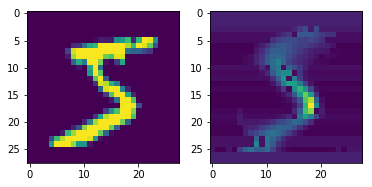

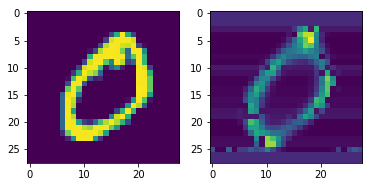

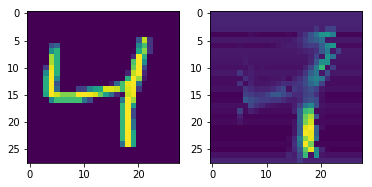

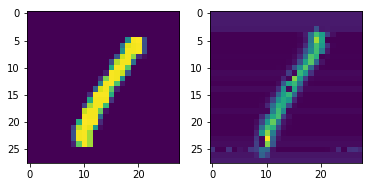

In [239]:
def show_reco(enc, dec):
    # now visualise
    how_many = 4
    latent = enc.predict(x_train[:how_many])
    reco = dec.predict(latent)
    for i in range(how_many):
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(x_train[i])
        ax[1].imshow(reco[i])
        plt.show()
        
def check_latent_space(enc, dec, x, y, from_nb=0, to_nb=1, how_many=5, show_avg=False):
    
    # determine the average latent space repr of number
    avgz = {}
    if show_avg:
        fig, ax = plt.subplots(1, 10, figsize=(20, 5))
        
    for nb in range(10):
        flaty = np.argmax(y, axis=1)
        x1 = x[flaty==nb]
        try:
            z1, _ = enc.predict(x1)
        except:
            z1 = enc.predict(x1)
        avgz[nb] = np.average(z1, axis=0)
    
        if show_avg:
            avg_image = dec.predict(avgz[nb].reshape(1, -1))[0]
            ax[nb].imshow(avg_image)
    if show_avg:
        plt.show()
    
    # go from 0 to 1 smoothly in latent space
    all_digits = np.zeros(shape=(how_many, latent_dim))
    for d in range(latent_dim):
        dim = np.linspace(avgz[from_nb][d], avgz[to_nb][d], how_many)
        all_digits[:, d] = dim
    
    # plot the smooth ones in latent space
    all_images = dec.predict(all_digits)
    fig, ax = plt.subplots(1, how_many, figsize=(20, 5))
    for i in range(how_many):
        image = all_images[i]
        ax[i].imshow(image)
    plt.show()

show_reco(encoder_ae, decoder_ae)

# Build a VAE

In [242]:
latent_dim = 32

encoder_input = layers.Input(shape=(28,28), name='image')
x = layers.Reshape((28*28,))(encoder_input)
x = layers.Dense(128, activation='relu')(x)
mu = layers.Dense(latent_dim, activation='linear', name='mu')(x)
log_var = layers.Dense(latent_dim, activation='exponential', name='log_var')(x)
#x = layers.Concatenate(name='concatenate')([mu, log_var])
#encoder_output = layers.Reshape(target_shape=(latent_dim, 2), name='encoder_output')(x)
encoder = keras.Model(inputs=encoder_input, outputs=[mu, log_var], name='encoder')

#encoder.summary()

decoder_input = layers.Input(shape=(latent_dim), name='latent_space')
x = layers.Dense(128, activation='relu')(decoder_input)
x = layers.Dense(28**2, activation='softmax')(x)
decoder_output = layers.Reshape((28,28), name='reco_image')(x)
decoder = keras.Model(inputs=decoder_input, outputs=decoder_output, name='decoder')

#decoder.summary()

vae_input = layers.Input((28,28), name='image')
mu, log_var = encoder(vae_input)
normal = layers.Input(shape=(latent_dim,), name='random_normal')
z = layers.Add(name='latent_space')([mu, keras.backend.exp(log_var) * normal])
reco_image = decoder(z)
vae = keras.Model(inputs=[vae_input, normal], outputs=[z, reco_image], name='vae')

vae.summary(line_length=116)

vae.compile(optimizer='adam',
            loss={'latent_space':'kullback_leibler_divergence',
                  'decoder':'binary_crossentropy'})

random_normal = np.random.normal(size=(x_train.shape[0], latent_dim))
vae.fit({'image':x_train, 'random_normal':random_normal},
        {'latent_space':random_normal, 'decoder':x_train},
        epochs=5)


Model: "vae"
____________________________________________________________________________________________________________________
Layer (type)                          Output Shape             Param #       Connected to                           
image (InputLayer)                    [(None, 28, 28)]         0                                                    
____________________________________________________________________________________________________________________
encoder (Model)                       [(None, 32), (None, 32)] 108736        image[0][0]                            
____________________________________________________________________________________________________________________
tf_op_layer_Exp_37 (TensorFlowOpLayer [(None, 32)]             0             encoder[1][1]                          
____________________________________________________________________________________________________________________
random_normal (InputLayer)            [(None, 32)] 

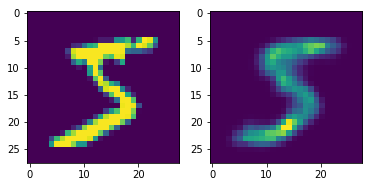

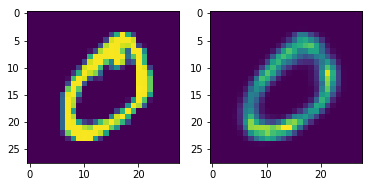

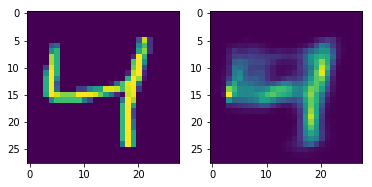

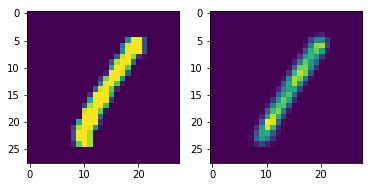

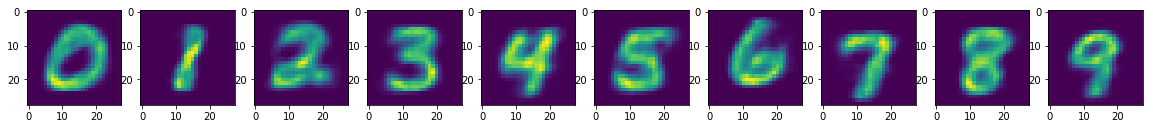

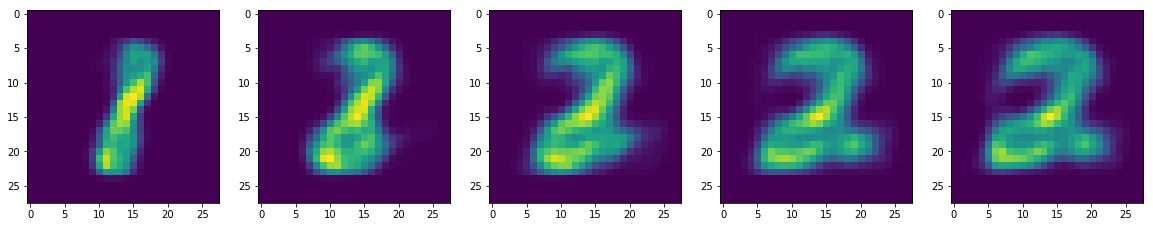

In [243]:
show_reco(encoder, decoder)
#check_latent_space(encoder_ae, decoder_ae, x_test, y_test, from_nb=1, to_nb=2, show_avg=True)
check_latent_space(encoder, decoder, x_test, y_test, from_nb=1, to_nb=2, show_avg=True)